_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [47]:
## Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
## cargar el dataset

In [49]:
df_data = pd.read_csv('/Users/josejp/Documents/2025/1_UNIR/Semenstre_1/Tecnicas de Aprendizaje Automatico/Actividad_1/AirQualityUCI.csv', sep=';', dtype="str", encoding='utf-8')

<p style="color: lightgreen">Se carga el Dataset indicando algunos argumentos que son utiles para indicar a la liberia pandas a interpretar los datos.</p>
<p style="color: lightgreen">Se especifica que el separador es punto y coma, los tipos de datos de todas las columnas es String y el decodificador utf-8.</p>
<p style="color: lightgreen">Esta primera carga se hace con los argumentos más basicos para tener control de como se cargan los datos y no dar por hecho alguna caracteristica.</p>

In [50]:
## ¿cuántas instancias tiene el dataset?
# 1. El DF se ha cargado con todas las columnas como string para evitar problemas de conversión y hacer un anilisis inicial antes de convertir tipos de datos.
# Revisamos el DF con los datos antes de nada.
print(df_data.head(5))

# Hay columnas 'Unnamed' que según se puede ver en el dataset son columnas vacias, por lo que se podrian eliminar.
print(f'Revisamos si la columna Unnamed: 15 tiene solo valores nulos = {df_data['Unnamed: 15'].drop_duplicates()}')
print(f'Revisamos si la columna Unnamed: 16 tiene solo valores nulos = {df_data['Unnamed: 16'].drop_duplicates()}')

# Despues de confirmar el punto anterior procedemos a eliminar las columnas vacias.
df_data = df_data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Tambien se observa que las últimas filas del dataset están vacias y se pueden eliminar.
print(f'Revisamos las últimas 5 filas del dataset:\n{df_data.tail(5)}')

# Eliminamos todas las filas que estén completamente vacias.
df_data = df_data.dropna(how='all')

# Ahora si revisamos el tamaño de instancias del DF limpio
print(f'El dataset tiene {df_data.shape[0]} instancias.')

         Date      Time CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6        1360      150     11,9          1046   
1  10/03/2004  19.00.00      2        1292      112      9,4           955   
2  10/03/2004  20.00.00    2,2        1402       88      9,0           939   
3  10/03/2004  21.00.00    2,2        1376       80      9,2           948   
4  10/03/2004  22.00.00    1,6        1272       51      6,5           836   

  NOx(GT) PT08.S3(NOx) NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH  \
0     166         1056     113         1692        1268  13,6  48,9  0,7578   
1     103         1174      92         1559         972  13,3  47,7  0,7255   
2     131         1140     114         1555        1074  11,9  54,0  0,7502   
3     172         1092     122         1584        1203  11,0  60,0  0,7867   
4     131         1205     116         1490        1110  11,2  59,6  0,7888   

  Unnamed: 15 Unnamed: 16  
0         NaN         NaN  


<p style="color: lightgreen">Antes de calcular el número de instancias hacemos una limpieza básica del dataset.</p>
<p style="color: lightgreen">1. Revisamos cómo se han cargado los datos en el DF. Encontramos que hay columnas sin nombre (Unamed)</p>
<p style="color: lightgreen">2. Revisamos si las columnas sin nombre solo tienen valores nulos. Tras confirmarlo, se borran las columnas sin nombre y que solo tienen valores nulos. </p>
<p style="color: lightgreen">3. Tambien se verifica si hay filas con solo valores nulos. En este caso, tambien se borran todas las filas con valores nulos.</p>
<p style="color: lightgreen">Despues de la limpieza, podemos calcular el tamaño de las instancias que son <code>9357</code></p>



In [51]:
## ¿cuál es el tipo de datos de cada una de las columnas?

# Todos los tipos de datos son STR ya que cargé el dataset inicialmente.
print(df_data.dtypes)

# Revisamos si hay columnas que deban ser convertidas a otros tipos de datos.
print(df_data.head(5))

# Creamos una lista de columnas que deben ser convertidas por tipos.
cols_to_convert = {
	# 'Date': 'datetime64[ns]',
	'Time': 'str',
	'CO(GT)': 'float',
	'PT08.S1(CO)': 'float',
	'NMHC(GT)': 'float',
	'C6H6(GT)': 'float',
	'PT08.S2(NMHC)': 'float',
	'NOx(GT)': 'float',
	'PT08.S3(NOx)': 'float',
	'NO2(GT)': 'float',
	'PT08.S4(NO2)': 'float',
	'PT08.S5(O3)': 'float',
	'T': 'float',
	'RH': 'float',
	'AH': 'float'
}
# En lugar de convertir todas las columnas, considero más rapido volver a cargar el DF pasando los tipos  de datos correctos
# Esto lo hago para mantener trazabilidad de lo que he estado haciendo, porque podria regresar a las celdas y ajustar directamente cada una.
df_data = pd.read_csv('/Users/josejp/Documents/2025/1_UNIR/Semenstre_1/Tecnicas de Aprendizaje Automatico/Actividad_1/AirQualityUCI.csv', sep=';', dtype=cols_to_convert, parse_dates=["Date"], dayfirst=True, encoding='utf-8', decimal=',')
df_data = df_data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
df_data = df_data.dropna(how='all')
print(df_data.dtypes)

Date             object
Time             object
CO(GT)           object
PT08.S1(CO)      object
NMHC(GT)         object
C6H6(GT)         object
PT08.S2(NMHC)    object
NOx(GT)          object
PT08.S3(NOx)     object
NO2(GT)          object
PT08.S4(NO2)     object
PT08.S5(O3)      object
T                object
RH               object
AH               object
dtype: object
         Date      Time CO(GT) PT08.S1(CO) NMHC(GT) C6H6(GT) PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6        1360      150     11,9          1046   
1  10/03/2004  19.00.00      2        1292      112      9,4           955   
2  10/03/2004  20.00.00    2,2        1402       88      9,0           939   
3  10/03/2004  21.00.00    2,2        1376       80      9,2           948   
4  10/03/2004  22.00.00    1,6        1272       51      6,5           836   

  NOx(GT) PT08.S3(NOx) NO2(GT) PT08.S4(NO2) PT08.S5(O3)     T    RH      AH  
0     166         1056     113         1692        1268  13,6  48,9  0,7578  
1

<p style="color: lightgreen">Inicialmente, todas las columnas son de tipo String, ya que por experiencia personal hay que revisar antes lo que se ha cargado sin complicarse por los tipos de datos.</p>
<p style="color: lightgreen">Una vez revisado, se puede proceder a asignar un tipo de dato por columna. Tambien le podria dejar a la libreria PANDAS que asigne el tipo de dato de forma automatica, pero por experiencia personal hay que asignarlo de form individual. En este caso, dejamos como FLOAT los tipos de datos numericos y Strig el campo de fecha</p>

In [52]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
df_data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

<p style="color: lightgreen">En el dataset no tenemos ninguna columna categorica, tenemos solo columnas cuantitativas continuas.</p>
<p style="color: lightgreen">Más adelante, podriamos crear algunas columnas categoricas según lo que se necesite. Por ejemplo, podemos agrupar las fechas por meses o años, las horas podemos agruparlas por mañana, tarde y noche. Esto no lo hacemos ahora, ya que considero que es muy pronto para hacerlo sin conocer la totalidad del ejercicio.</p>

In [53]:
## ¿existen valores nulos en el dataset?

# Antes identificamos columnas y filas nulas, pero ahora revisamos si hay valores nulos
print(df_data.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


<p style="color: lightgreen">Antes se trabajó directamente con columnas y filas completamente nulas. Sin embargo, ahora se ha analisado cada columna, para asegurarnos de no tener ningun valor nulo.</p>

In [54]:
## ¿cuál es la variable respuesta?¿de qué tipo es?
df_data.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


<p style="color: lightgreen">Según la publicación del dataset, hay más de una variable respuesta que se puede utilizar en el estudio, por lo que la selección va a depender de lo que queremos analizar. Estas variables son todas cuantitativas continuas.</p>
<p style="color: lightgreen">Las variables respuestas en el data set son:</p>
<ul>CO(GT)</ul>
<ul>NMHC(GT)</ul>
<ul>C6H6(GT)</ul>
<ul>NOx(GT)</ul>
<ul>NO2(GT)</ul>

In [55]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 
df_data[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe()

,CO(GT),NOx(GT),NO2(GT)
count,9357.000000,9357.000000,9357.000000
mean,-34.207524,168.616971,58.148873
std,77.657170,257.433866,126.940455
min,-200.000000,-200.000000,-200.000000
25%,0.600000,50.000000,53.000000
50%,1.500000,141.000000,96.000000
75%,2.600000,284.000000,133.000000
max,11.900000,1479.000000,340.000000


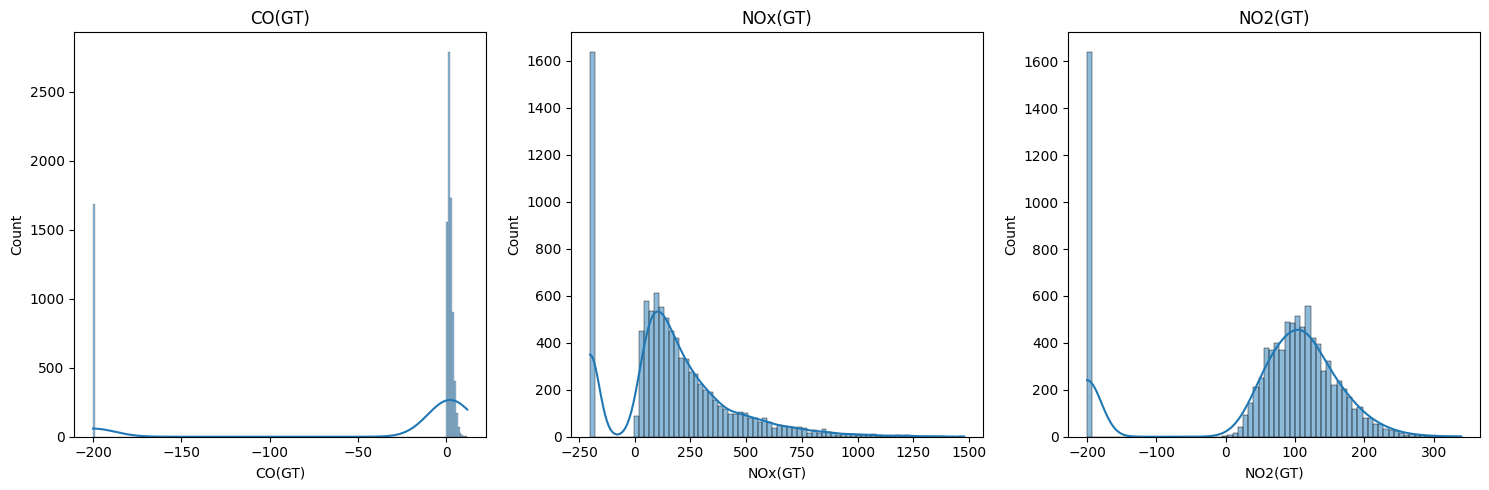

In [56]:
# Visualizamos las distribuciones
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_data['CO(GT)'], kde=True)
plt.title('CO(GT)')
plt.subplot(1, 3, 2)
sns.histplot(df_data['NOx(GT)'], kde=True)
plt.title('NOx(GT)')
plt.subplot(1, 3, 3)
sns.histplot(df_data['NO2(GT)'], kde=True)
plt.title('NO2(GT)')
plt.tight_layout()
plt.show()


<p style="color: lightgreen">En base a los valores estadisticos y la distribución se puede observar que las tres variables CO, NOx y NO2 siguen una distribución asimetrica y tiene cola larga hacia valores extremos negativos.</p>

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

<p style="color: lightgreen">Estas variables siguen una distribución normal con concentración en valores pequeños y colas largas hacia valores negativos. Gracias a este analisis, estamos encontrando que hay valores faltantes marcadas con el número -200, las cuales debemos tener en cuenta para el analisis. Estas variables son candidadas de eliminar del dataset.</p>

In [57]:
# Número de valores -200 en la variables
print(f'CO(GT) =  {(df_data['CO(GT)'] == -200).sum()}')
print(f'NOx(GT) =  {(df_data['NOx(GT)'] == -200).sum()}')
print(f'NO2(GT) =  {(df_data['NO2(GT)'] == -200).sum()}')


CO(GT) =  1683
NOx(GT) =  1639
NO2(GT) =  1642


<p style="color: lightgreen">Se muestra el total de registros con valores -200 en cada variable.</p>

In [58]:
## ¿cómo son las correlaciones entre las variables del dataset?

print(f'\033[92m Correlación entre sensores y contaminantes (reemplazando -200 por NaN): \033[0m')

print(df_data[['CO(GT)', 'PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)']].replace(-200, np.nan).corr())

print(f'\033[92m Correlación entre contaminantes \033[0m')
print(df_data[['CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']].replace(-200, np.nan).corr())

print(f'\033[92m Correlación entre variables ambientales \033[0m')
print(df_data[['T', 'RH', 'AH']].replace(-200, np.nan).corr())


 Correlación entre sensores y contaminantes (reemplazando -200 por NaN): 
                 CO(GT)  PT08.S1(CO)  NMHC(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.879288  0.889734       0.915514  0.795028   
PT08.S1(CO)    0.879288     1.000000  0.790670       0.892964  0.713654   
NMHC(GT)       0.889734     0.790670  1.000000       0.877696  0.812685   
PT08.S2(NMHC)  0.915514     0.892964  0.877696       1.000000  0.704435   
NOx(GT)        0.795028     0.713654  0.812685       0.704435  1.000000   
PT08.S3(NOx)  -0.703446    -0.771938 -0.771135      -0.796703 -0.655707   
NO2(GT)        0.683343     0.641529  0.731193       0.646245  0.763111   
PT08.S4(NO2)   0.630703     0.682881  0.853267       0.777254  0.233731   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  
CO(GT)            -0.703446  0.683343      0.630703  
PT08.S1(CO)       -0.771938  0.641529      0.682881  
NMHC(GT)          -0.771135  0.731193      0.853267  
PT08.S2(NMHC)     -0.796703  0.646

<p style="color: lightgreen">Antes de hacer la correlación se reemplzan los valores "-200" a valores NaN que representan a datos faltantes. Ahora, para responder a las correlaciones entre variables vamos a agruparlas según los indicadores que representan cada una.</p>
<p style="color: yellow">Agrupadas por Sensores y Contaminantes</p>
<p style="color: lightgreen">Se observa que los sensores tienen entre moderada y alta correlación con los contaminantes. En algunos casos, se observa que la correlación entre el sensor y su principal contaminante no es la mas alta. Por ejemplo, el sensor PT08.S2(NMHC) tiene una correlación de 0.87 con el contaminante NMHC, sin embargo tiene una correlación de 0.91 con el contaminante CO. Esto podria explicarse, ya que en el dataset se mensiona que son multisensores y tienen sensibilidad cruzada entre contaminantes.</p>
<p style="color: yellow">Agrupadas por Contaminantes</p>
<p style="color: lightgreen">Se observa que hay una fuerte correlación entre los contaminantes de entre 0.68 y 0.88. Los contaminantes con mayor correlación son CO y NMHC con 0.88, seguido de NMHC y NOx con 0.81.</p>
<p style="color: yellow">Agrupadas por variables Ambientables</p>
<p style="color: lightgreen">Se observa una correlación negativa entre la temperatura y humedad relativa. Esto sería un comportamiento esperado en el sistema.</p>

In [59]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?
df_data[['CO(GT)', 'PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','T', 'RH', 'AH']].replace(-200, np.nan).corr()['CO(GT)'].sort_values(ascending=False).head(4)


CO(GT)           1.000000
PT08.S2(NMHC)    0.915514
NMHC(GT)         0.889734
PT08.S1(CO)      0.879288
Name: CO(GT), dtype: float64

<p style="color: lightgreen">Se define como variable objetivo, a partir de esta pregunta, a la variable <code>CO(GT)</code>.</p>
<p style="color: lightgreen">Las 3 variables con más correlación con la variable objetivo son: PT08.S2(NMHC), NMHC(GT) y PT08.S1(CO). Representan a 2 sensores uno de CO y otro de NMHC y tambien tiene una fuerte correlación con el contaminante NMHC, lo cual explica la alta correlación con su sensor.</p>

In [60]:
## ¿existe alguna variable que no tenga correlación?
df_data[['CO(GT)', 'PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','T', 'RH', 'AH']].replace(-200, np.nan).corr()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),T,RH,AH
CO(GT),1.000000,0.879288,0.889734,0.915514,0.795028,-0.703446,0.683343,0.630703,0.022109,0.048890,0.048556
PT08.S1(CO),0.879288,1.000000,0.790670,0.892964,0.713654,-0.771938,0.641529,0.682881,0.048627,0.114606,0.135324
NMHC(GT),0.889734,0.790670,1.000000,0.877696,0.812685,-0.771135,0.731193,0.853267,0.391587,-0.191454,0.269738
PT08.S2(NMHC),0.915514,0.892964,0.877696,1.000000,0.704435,-0.796703,0.646245,0.777254,0.241373,-0.090380,0.186933
NOx(GT),0.795028,0.713654,0.812685,0.704435,1.000000,-0.655707,0.763111,0.233731,-0.269683,0.221032,-0.149323
PT08.S3(NOx),-0.703446,-0.771938,-0.771135,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.145112,-0.056740,-0.232017
NO2(GT),0.683343,0.641529,0.731193,0.646245,0.763111,-0.652083,1.000000,0.157360,-0.186533,-0.091759,-0.335022
PT08.S4(NO2),0.630703,0.682881,0.853267,0.777254,0.233731,-0.538468,0.157360,1.000000,0.561270,-0.032188,0.629641
T,0.022109,0.048627,0.391587,0.241373,-0.269683,-0.145112,-0.186533,0.561270,1.000000,-0.578621,0.656397
RH,0.048890,0.114606,-0.191454,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,-0.578621,1.000000,0.167971


<p style="color: lightgreen">No hay variables que tengan correlación 0, pero si algunas que tienen muy poca correlación. Por ejemplo, la temperatura (T) y CO, con una correlación de 0.02.</p>

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

<p style="color: lightgreen">El dataset necesita un trabajo minimo de limpieza e interpretación de decimales, ya que hay campos y valores vacios, además de valores como "-200" que representan a datos faltantes y que si no los quitamos pueden alterara la correlación entre variables. Por otro lado, la correlación entre las diferentes variables es de moderada a alta, por lo que el uso de todas las variables puede aportar al modelo predictivo.</p>

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pandas import DataFrame

scaler = StandardScaler()

# X_train = DataFrame(scaler.fit_transform(X_train))
# X_test = DataFrame(scaler.fit_transform(X_test))

In [62]:
# Limpiamos el dataset

# Reemplazamos -200 por NaN
df_data_clean = df_data.replace(-200, np.nan)
# Borramos columnas GT que no es la variable objetivo
df_data_clean = df_data_clean.drop(columns=['C6H6(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'])
# Borramos Date y Time para simplificar el dataset
df_data_clean = df_data_clean.drop(columns=['Date', 'Time'])
# Borrar filas que tengan al menos un valor nulo
df_data_clean = df_data_clean.dropna()

<p style="color: lightgreen">Limpiamos el dataset, siguiendo los pasos a continuación:</p>
<p style="color: lightgreen">1. Reemplazamos los valores -200 por NaN.</p>
<p style="color: lightgreen">2. Eliminamos las columnas que son variables de analizadores de referencia.</p>
<p style="color: lightgreen">3. Eliminamos las columnas de fecha y hora.</p>
<p style="color: lightgreen">4. Eliminamos las filas que tienen al menos un valor nulo, ya que no podemos hacer el escalado y entrenamiento con valores nulos.</p>

In [63]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

In [64]:
# Se elige CO(GT) como variable objetivo
X = df_data_clean.drop(columns=['CO(GT)'])
y = df_data_clean['CO(GT)']

In [65]:
# separar datos de entrenamiento y test

In [66]:
# Se configura el split para 20% de test y 80% de train
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

<p style="color: lightgreen">Separamos los datos de entrenamiento siguiendo la distribución de 80% Train y 20% Test.</p>

In [67]:
# entrena el modelo con los datos de entrenamiento

In [68]:
# escalar datos
X_train = DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test = DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


<p style="color: lightgreen">Escalamos los datos de entrenamiento y test.</p>
<p style="color: lightgreen">Entrenamos el modelo de regresión lineal haciendo uso de la libreria sklearn.</p>


In [69]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [70]:
print(f'Coeficientes del modelo: \n{pd.Series(model.coef_,index=X_train.columns)}')
print(f'Intercepto del modelo: {model.intercept_}')

Coeficientes del modelo: 
PT08.S1(CO)      0.386417
PT08.S2(NMHC)    1.375443
PT08.S3(NOx)     0.200659
PT08.S4(NO2)    -0.188161
PT08.S5(O3)     -0.066859
T               -0.256580
RH              -0.041827
AH               0.099326
dtype: float64
Intercepto del modelo: 2.1359148936170214


Explica qué indican estos parámetros

<p style="color: lightgreen">Se han calculado los parametros anteriores de coeficientes e intercepto para los valores de entrenamiento de X escalados. El sensor PT08.S2(NMHC) representa el coeficiente mayor, indicando que es la variable con mayor influencia positiva en la predicción de CO, seguidamente están los sensores PT08.S1(CO) y PT08.S3(NOx). La variable ambiental de temperatura (T) tiene una relación negativa. Finalmente, el intercepto representa el valor estimado de CO cuando las variables explicativas están en su valor medio.</p>

In [71]:
# realiza las predicciones para el conjunto de datos de test

In [72]:
y_pred = model.predict(X_test)


In [73]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R2: {r2}')
print(f'RMSE: {rmse}')

R2: 0.897690672254852
RMSE: 0.44684445847529747


<p style="color: lightgreen">Al ser esta una regresión lineal básica vamos a utilizar las siguientes métricas más representativas: <code>R2</code> y <code>RMSE</code>. El coeficiente de determinación R2 indica la variabilidad explicada del modelo. Si el valor es cercano a 1 indica un buen ajuste del modelo a la variable CO, nuestra variable objetivo. RMSE nos va a indicar el error promedio que tiene el modelo al predecir el valor de CO en sus mismas unidades.</p>

In [75]:
# ¿Qué error tiene el modelo? Explícalo.

<p style="color: lightgreen">El modelo tiene un error promedio de 0.446 unidades de CO (mg/m^3). Es decir, que cada predicción se desvia del valor real en aproximadamente 0.446 mg/m^3, este valor se obtiene mediante la metrica RMSE.</p>

<p style="color: lightgreen">En la imagen siguiente podemos observar que el valor real (eje X) y el valor predicho (eje Y) se asemejan bastante, lo que se relaciona con el valor de R2 de 0.89. Es decir, que el modelo explica el 89% de la variabilidad de la variable CO. Tambien se observar valores predichos alejados del valor real que se puede explicar con la variación del valor real en aproximadamente de 0.446 mg/m^3, que nos indica el RMSE.</p>

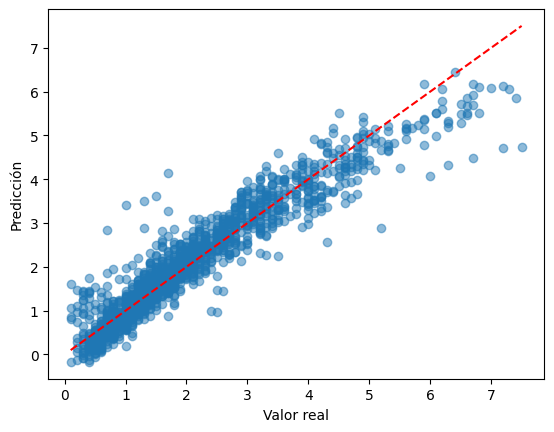

In [76]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.show()


Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

<p style="color: lightgreen">Por mi parte, entiendo que al indicar "todas las variables del dataset" se refiere tambien a las variable GT que son las de analizadores de referencia que para el modelo anterior se quitaron, ya que son valores que se intenta predecir a partir de los sensores.</p>

In [77]:
# Limpiamos el dataset

# Reemplazamos -200 por NaN
df_data_all = df_data.replace(-200, np.nan)
# Incluimos otras columnas GT que no son la variable objetivo
# Borramos Date y Time para simplificar el dataset
df_data_all = df_data_all.drop(columns=['Date', 'Time'])
# Borrar filas que tengan al menos un valor nulo
df_data_all = df_data_all.dropna()

# Se elige CO(GT) como variable objetivo
X_all = df_data_all.drop(columns=['CO(GT)'])
y_all = df_data_all['CO(GT)']

In [78]:
# Se configura el split para 20% de test y 80% de train
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all,
    y_all,
    test_size=0.2,
    random_state=42
)

# escalar datos
X_train_all = DataFrame(
    scaler.fit_transform(X_train_all),
    columns=X_train_all.columns,
    index=X_train_all.index
)
X_test_all = DataFrame(
    scaler.transform(X_test_all),
    columns=X_test_all.columns,
    index=X_test_all.index
)

from sklearn.linear_model import LinearRegression
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [79]:
print(f'Coeficientes del modelo 2: \n{pd.Series(model_all.coef_,index=X_train_all.columns)}')
print(f'Intercepto del modelo 2: {model_all.intercept_}')

y_pred_all = model_all.predict(X_test_all)

r2_m = r2_score(y_test_all, y_pred_all)
rmse_m = np.sqrt(mean_squared_error(y_test_all, y_pred_all))

print(f'R2: {r2_m}')
print(f'RMSE: {rmse_m}')

Coeficientes del modelo 2: 
PT08.S1(CO)      0.347153
NMHC(GT)         0.194091
C6H6(GT)         1.106391
PT08.S2(NMHC)   -0.299654
NOx(GT)          0.349323
PT08.S3(NOx)    -0.038650
NO2(GT)          0.144975
PT08.S4(NO2)    -0.223367
PT08.S5(O3)     -0.210786
T               -0.204506
RH              -0.129500
AH               0.125356
dtype: float64
Intercepto del modelo 2: 2.374735249621785
R2: 0.9721733275987304
RMSE: 0.240676742223628


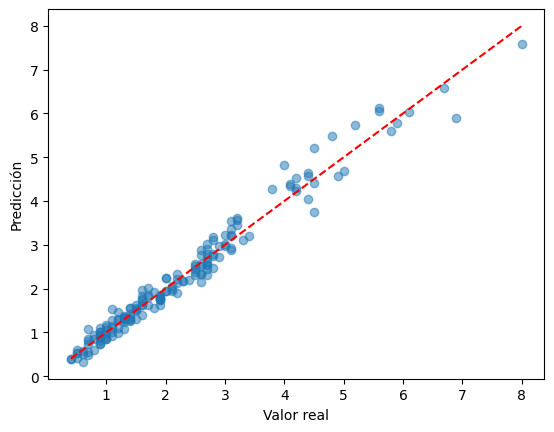

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_test_all, y_pred_all, alpha=0.5)
plt.plot([y_test_all.min(), y_test_all.max()],
         [y_test_all.min(), y_test_all.max()],
         'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.show()


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

In [81]:
print('Modelo\t\t\tR2\t\tERROR')
print(f'LR (simple)\t\t{r2:.4f}\t\tRMSE={rmse:.4f}')
print(f'MRL (multiple)\t\t{r2_m:.4f}\t\tRMSE={rmse_m:.4f}')

Modelo			R2		ERROR
LR (simple)		0.8977		RMSE=0.4468
MRL (multiple)		0.9722		RMSE=0.2407


<p style="color: lightgreen">Las metricas del segundo modelo son mejores. El R2 es 0.97 y RMSE es 0.24. Es decir, que el modelo explica el 97% de la variabilidad de la variable objetivo CO y tiene un promedio de error de aproximadamente 0.24 mg/m^3.</p>

<p style="color: lightgreen">Sin embargo, este aumento de rendimiento se debe a que ahora estamos utilizando otras variables procedentes de analizadores de referencia. Este modelo tiene problema de <code>data leak</code> y limita su uso en un escenario real de producción. El data leak se produce porque el modelo está utilizando datos que no tendria en el mundo real, que son los otros analizadores de referencias, que además tienen un fuerte correlación con nuestra variable objetivo CO. Por otro lado, tambien limita su uso productivo, ya que en el dataset tiene como objetivo mostrar los indicadores de sensores para predecir los contaminantes y no hacer uso de los analizadores de referencia.</p>

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

<p style="color: lightgreen">Estos hiperparámetros son ajustes que se le puede hacer a la función DecisionTreeRegressor de la libreria scikit-learn.</p>
<ul style="color: lightgreen">criterion: El criterio para medir calidad de la partición del conjunto de datos. Si no se indica un valor, toma squared_error.</ul>
<ul style="color: lightgreen">splitter: Es la estrategia para elegir la mejor división. Puede ser "best" para la mejor división de cada nodo o "random" para la mejor división de una división aleatoria. El valor por defecto es "best".</ul>
<ul style="color: lightgreen">max_depth: La profundidad de los nodos del arbol. Si no se indica un valor se expande todos los nodos o hasta que todas las hojas tengan menos muestras que "min_samples_split".</ul>
<ul style="color: lightgreen">min_samples_split: Es el número minimo de muestras que se necesita para dividir un nodo.</ul>
<ul style="color: lightgreen">min_samples_leaf: Es para garantizar el minimo número de registros que deben tener las hojas finales.</ul>
<ul style="color: lightgreen">max_features: El máximo de caracteristicas en cada división.</ul>

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

<p style="color: lightgreen">Antes de explicar a qué se refiere este parámetro hay que entender a qué se refiere la documentación con impureza. Se utiliza el concepto para referirse a la varianza o al error cuadratico medio (MSE) de la variable objetivo dentro del nodo. Por lo que ese parámetro actua como condición para que un nodo sea dividido. Es decir, se calcula la diferencia entre la varianza padre y la varianza de la división y si esa diferencia es mayor o igual a min_impurity_decrease se ejecuta la división. Esto se hace para garantizar que la división aporta una división significativa al modelo, evitando particiones debidas al ruido y reduciendo el riesgo de sobreajuste.</p>

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [82]:
# hacemos uso de las variables anteriores donde entrenamos el modelo 2 de la regresión lineal multiple
# X_all
# y_all
# X_train_all
# y_train_all
# X_test_all
# y_test_all

In [83]:
# Importamos las dependencias y ejecutamos el modelo de arbol de decisión
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42, criterion = 'poisson', max_depth = 10, min_samples_split = 10, min_samples_leaf = 2, max_features = None)
dt.fit(X_train_all, y_train_all)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'poisson'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nod

Calcula MAE, R2 y RMSLE

In [84]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

y_pred_dt = dt.predict(X_test_all)

dt_mae = mean_absolute_error(y_test_all, y_pred_dt)
dt_r2 = r2_score(y_test_all, y_pred_dt)
dt_rmsle = np.sqrt(mean_squared_log_error(y_test_all, y_pred_dt))

print(f'R2: {dt_r2}')
print(f'MAE: {dt_mae}')
print(f'RMSLE: {dt_rmsle}')



R2: 0.9535641591601598
MAE: 0.2246946047495303
RMSLE: 0.08476551439310204


<p style="color: lightgreen">Estas variables muestran las metricas de medición del arbol de decisión. El R2 de 0.95 explica el 95% de la variabilidad de la variable objetivo CO. Mientras que el MAE, representa que el error promedio absoluto aproximado es de 0.22 mg/m^3. Finalmente, el RMSLE representa el error relativo medio, lo que quiere decir que el error relativo medio es bajo, cercano al 8%.</p>

¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [85]:
# para saber si existe overfitting calculamos las métricas para los datos de prueba
# Predicciones
y_pred_train_all = dt.predict(X_train_all)
y_pred_test_all  = dt.predict(X_test_all)

# Métricas
r2_train = r2_score(y_train_all, y_pred_train_all)
r2_test  = r2_score(y_test_all, y_pred_test_all)

mae_train = mean_absolute_error(y_train_all, y_pred_train_all)
mae_test  = mean_absolute_error(y_test_all, y_pred_test_all)

print(f'Metricas de train:')
print(f'R2: {r2_train}')
print(f'MAE: {mae_train}')

print(f'\nMetricas de test:')
print(f'R2: {r2_test}')
print(f'MAE: {mae_test}')


Metricas de train:
R2: 0.990533326100938
MAE: 0.09578307995969575

Metricas de test:
R2: 0.9535641591601598
MAE: 0.2246946047495303



<p style="color: lightgreen">Para saber si un modelo está incurriendo en <code>overfitting</code> es necesario calcular metricas como R2 y MAE de los datos de train y test. Lo primero que se podria pensar, es que los datos de entrenamiento van a ser superiores en comparación a los datos de test, ya que son datos "vistos" por el modelo. Sin embargo, al comparar las metricas de ambos conjuntos de datos podemos evaluar las capacidad del modelo.</p>
<p style="color: lightgreen">En este caso, los valores de R2 obtenidos para los datos de train y test son de 0.99 y 0.95 respectivamente. Lo que indica que el modelo explica una proporción elevada en ambos conjuntos de datos. Esto sugiere que el modelo no ha "memorizado" los datos de train. Por otro lado, el MAE tiene una diferencia de 0.13 entre entrenamiento y test (0.22 - 0.09), lo que es esperado y refleja una mayor precisión en train.</p>
<p style="color: lightgreen">En general, se puede concluir que no existe overfitting significativo o que podria apreciarse un ligero overfitting, ya que las metricas obtenidas son bastante altas y similares.</p>

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

In [86]:
# Antes que nada, recuperamos las metricas de los modelos para tener una mejor foto comparativa en una tabla.
print('Modelo\t\t\tR2\t\tERROR')
print(f'LR (simple)\t\t{r2:.4f}\t\tRMSE={rmse:.4f}')
print(f'MRL (multiple)\t\t{r2_m:.4f}\t\tRMSE={rmse_m:.4f}')
print(f'DT (multiple)\t\t{dt_r2:.4f}\t\tMAE={dt_mae:.4f}')


Modelo			R2		ERROR
LR (simple)		0.8977		RMSE=0.4468
MRL (multiple)		0.9722		RMSE=0.2407
DT (multiple)		0.9536		MAE=0.2247


<p style="color: lightgreen">Con los modelos entrenados hasta ahora podemos visualizar la tabla comparativa de la celda anterior y sacar conclusiones sobre cada modelo.</p>
<p style="color: lightgreen">Los modelos etiquetados como multiple han sido entrenados con todas las variables de analisis de referencia (GT), las cuales se indicó anteriormente que producen problemas de data leak. Sin embargo las comparamos.</p>
<p style="color: lightgreen">Al comparar el R2 de los 3 modelos, el que tiene una mejor capacidad explicativa es el de Regresión Lineal Multiple. Este modelo no tiene el error más bajo pero se acerca bastante, además que un 0.24 mg/m^3 se puede considerar un error aceptable. Esto se tendria que contrastar con los criterios de aceptación en caso los tuvieramos.</p>
<p style="color: lightgreen">Sin embargo, el modelo de Regresión Lineal Multiple no se podria utilizar. Es un modelo que limita su uso productivo al ser entrenado con las otras variables de analisis de referencia. El unico modelo habilitado sería el de Regresión lineal simple. Que tiene unas metricas altas y podria ser aceptable en gran medida. Nuevamente, esto se tendria que contrastar con los criterios de aceptación.</p>


In [87]:
# Importamos las dependencias y ejecutamos el modelo de arbol de decisión
dt_s = DecisionTreeRegressor(random_state=42, criterion = 'poisson', max_depth = 10, min_samples_split = 100, min_samples_leaf = 20, max_features = None)
dt_s.fit(X_train, y_train)

y_pred_dt_s = dt_s.predict(X_test)

dt_mae_s = mean_absolute_error(y_test, y_pred_dt_s)
dt_r2_s = r2_score(y_test, y_pred_dt_s)
dt_rmsle_s = np.sqrt(mean_squared_log_error(y_test, y_pred_dt_s))

print(f'R2: {dt_r2_s}')
print(f'MAE: {dt_mae_s}')
print(f'RMSLE: {dt_rmsle_s}')


R2: 0.896630538733637
MAE: 0.3061502345644471
RMSLE: 0.142385629903845


<p style="color: lightgreen">Se genera un nuevo modelo de Arbol de decisión sin las variables de analisis de referencia en el entrenamiento. Por lo que este modelo no tendria el problema de data leak, explicado anteriormente.</p>
<p style="color: lightgreen">Este modelo ha sido entrenado con el mismo criterio de división, pero cambiando los parametros de profundidad y nodos. Los parametros que se están utilizando ahora han sido probados hasta alcanzar un R2, MAE y RMSLE optimo.</p>


In [88]:
print('Modelo\t\t\tR2\t\tERROR')
print(f'LR (simple)\t\t{r2:.4f}\t\tRMSE={rmse:.4f}')
print(f'MRL (multiple)\t\t{r2_m:.4f}\t\tRMSE={rmse_m:.4f}')
print(f'DT (multiple)\t\t{dt_r2:.4f}\t\tMAE={dt_mae:.4f}')
print(f'DT (simple)\t\t{dt_r2_s:.4f}\t\tMAE={dt_mae_s:.4f}')

Modelo			R2		ERROR
LR (simple)		0.8977		RMSE=0.4468
MRL (multiple)		0.9722		RMSE=0.2407
DT (multiple)		0.9536		MAE=0.2247
DT (simple)		0.8966		MAE=0.3062


<p style="color: lightgreen">Volvemos a comparar las metricas de todos los modelos entrenados hasta este punto.</p>
<p style="color: lightgreen">En esta oportunidad, ya tenemos 2 modelos validos que si podriamos utilizar en un entorno productivo. Los modelos LR (simple) y DT (simple) que han sido entrandos sin las variables de analisis de referencia y teniendo como variable objetivo CO.</p>
<p style="color: lightgreen">La comparación nos permite visualizar que el R2 de ambos modelos son casi identicos, pero el error en el modelo de Arbol de decisión es más bajo, lo que permitiria una mayor precisión en la predicciones.</p>

In [89]:
# tabla para comparar los modelos de arbol
print('Modelo\t\t\tdepth\tleaves\tnode_count')
print(f'DT (multiple)\t\t{dt.get_depth()}\t{dt.get_n_leaves()}\t{dt.tree_.node_count}')
print(f'DT (simple)\t\t{dt_s.get_depth()}\t{dt_s.get_n_leaves()}\t{dt_s.tree_.node_count}')

Modelo			depth	leaves	node_count
DT (multiple)		10	117	233
DT (simple)		10	103	205


<p style="color: lightgreen">En este punto, comparamos las caracteristicas entre el arbol de decisión multivariable y el arbol de decisión simple.</p>
<p style="color: lightgreen">Se puede observar que la profundiad entre ambos es 10, pero hay una clara diferencia entre las hojas y nodos generados. Esto viene porque los parámetros de ejemplos son más altos que en el modelo multivariable.</p>

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

In [90]:
print('Modelo\t\t\tR2\t\tERROR')
print(f'LR (simple)\t\t{r2:.4f}\t\tRMSE={rmse:.4f}')
print(f'MRL (multiple)\t\t{r2_m:.4f}\t\tRMSE={rmse_m:.4f}')
print(f'DT (multiple)\t\t{dt_r2:.4f}\t\tMAE={dt_mae:.4f}')
print(f'DT (simple)\t\t{dt_r2_s:.4f}\t\tMAE={dt_mae_s:.4f}')

Modelo			R2		ERROR
LR (simple)		0.8977		RMSE=0.4468
MRL (multiple)		0.9722		RMSE=0.2407
DT (multiple)		0.9536		MAE=0.2247
DT (simple)		0.8966		MAE=0.3062


<p style="color: lightgreen">A pesar que los modelos multiples presentan un mejor rendimiento, estos utilizan variables procedentes de analizadores de referencias, lo que introduce data leak y limita su uso productivo. Tomando como referencia el analisis de datos, las decisiones de limpieza de datos, selección de variables y tiempos computacionales, el modelo de arbol de decisión entrenado con variables disponibles en un escenario productivo obtiene la mejor relación entre fiabilidad y validez. Finalmente, el modelo de Arbol de decisión simple es el más adecuado para el problema planteado. </p>

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

<h1 style="color: yellow">Respuesta</h1>
<p style="color: lightgreen">El estudio de Khanh y Xuan (2022) tiene como objetivo predecir el rendimiento académico de los estudiantes mediante un enfoque que combinaArbol de decisión y Regresión lineal multiple. La investigación se basa en datos reales provenientes de fuentes oficiales de una institución educativa en Omán, recopilados entre los años 2017 y 2021, que incluyen información académica de más de 320 estudiantes.</p>
<p style="color: lightgreen">Se combinan dos técnicas de aprendizaje automático para situaciones especificas. En primer lugar,  se emplea un árbol de decisión como modelo de clasificación, que separa a los estudiantes en grupos para categorizarlos según su rendimiento. Posteriormente, se aplica un modelo de regresión lineal múltiple para predecir la variable objetivo, que representa el rendimiento académico del estudiante. </p>

<p style="color: lightgreen">Previo al entrenamiento, los datos han sido tratados para resolver algunos problema identificados. Reducir la cantidad de variables y eliminar variables poco informativas. Debido a que el conjunto de datos contiene un número elevado de atributos, de los cuales aportan poca información y aumentan innecesariamente el coste computacional. Se utiliza la técnica Information Gain (IG) para seleccionar las 17 variables más representativas, que son las que finalmente utilizan los modelos.</p>

<p style="color: lightgreen">Los principales resultados del estudio muestran que la combinación de ambos modelos de predicción se complementan para la identificación de estudiantes en riesgo y la estimación de su desempeño académico futuro. El enfoque híbrido permite integrar la capacidad interpretativa del árbol de decisión con la predicción cuantitativa de la regresión lineal múltiple.</p>

<p style="color: lightgreen">El árbol de decisión se emplea para clasificar a los estudiantes por categorías de rendimiento académico. Este modelo alcanza una precisión global de 0.47, lo que indica que clasifica correctamente el 47% de los casos. Sin embargo, el rendimiento del modelo varía según la clase considerada, llegando a valores más elevados para la clase "Excelente" que tiene un precisión de 63%.</p>

<p style="color: lightgreen">Por otro lado, el modelo de regresión lineal multiple obtiene un coeficiente de determinación de 0.316, lo que indica que el modelo explica el 31,6% de la variable de rendimiento académico del estudiante.</p>

<h1 style="color: yellow">Referencia</h1>
<p style="color: lightgreen">Dang, T. K., & Nguyen, H. H. X. (2022). <i>A Hybrid Approach Using Decision Tree and Multiple Linear Regression for Predicting Students’ Performance Based on Learning Progress and Behavior</i>. SN Computer Science, 3(5). https://doi.org/10.1007/s42979-022-01251-5</p>